# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

# Exercicio 1. (2.0 pontos)

Escreva em até quatro frases, uma breve apresentação sobre suas ideias do conjunto de dados e adicione qualquer contexto que possa ajudar os leitores a entendê-la.

**RESPOSTA** (VALE 2.0 pontos): Neste projeto, a ideia é,com base nesses parâmentros que nos foi fornecidos, já que no texto foi informado que os parametros são importantes para a identificação do cancer de mama, usaremos o algoritmo de classificação da regressão logistica para prever, com base nos dados, se a pessoa  tem ou não tem câncer de mama e como o modelo perfoma.

# Exercicio 2. (3.0 pontos)

Explore seu conjunto de dados e crie uma história em torno deles! Pense sobre o objetivo que deseja transmitir para seus leitores.

**RESPOSTA** (VALE 0.6 pontos): A respeito de classifcar se a pessoa teve ou não câncer de mama,a partir dos dados vamos criar os gráfico com o objetivo de como os dados estão se comportando e quem deve influenciar mais ou ter uma certa correlação com a classificação, assim os gráficos são para facilitar a compreensão e buscar rederências ques nos confirme o que está sendo mostrado.

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

In [1]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df_cancer = pd.read_csv(r'/home/gustavo/Área de Trabalho/Proj notebooks/Blue-Dados-Modulo2-projetos/projeto_02/dataR2.csv')

In [3]:
df_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
#trocar 1 por 0 e 2 por 1 aplicando o apply
def trocar_0_1(x):
    if x == 1:
        return 0
    else:
        return 1

In [5]:
df_cancer['Classification'] = df_cancer['Classification'].apply(trocar_0_1)

Vericando como estão distribuidos as variaveis

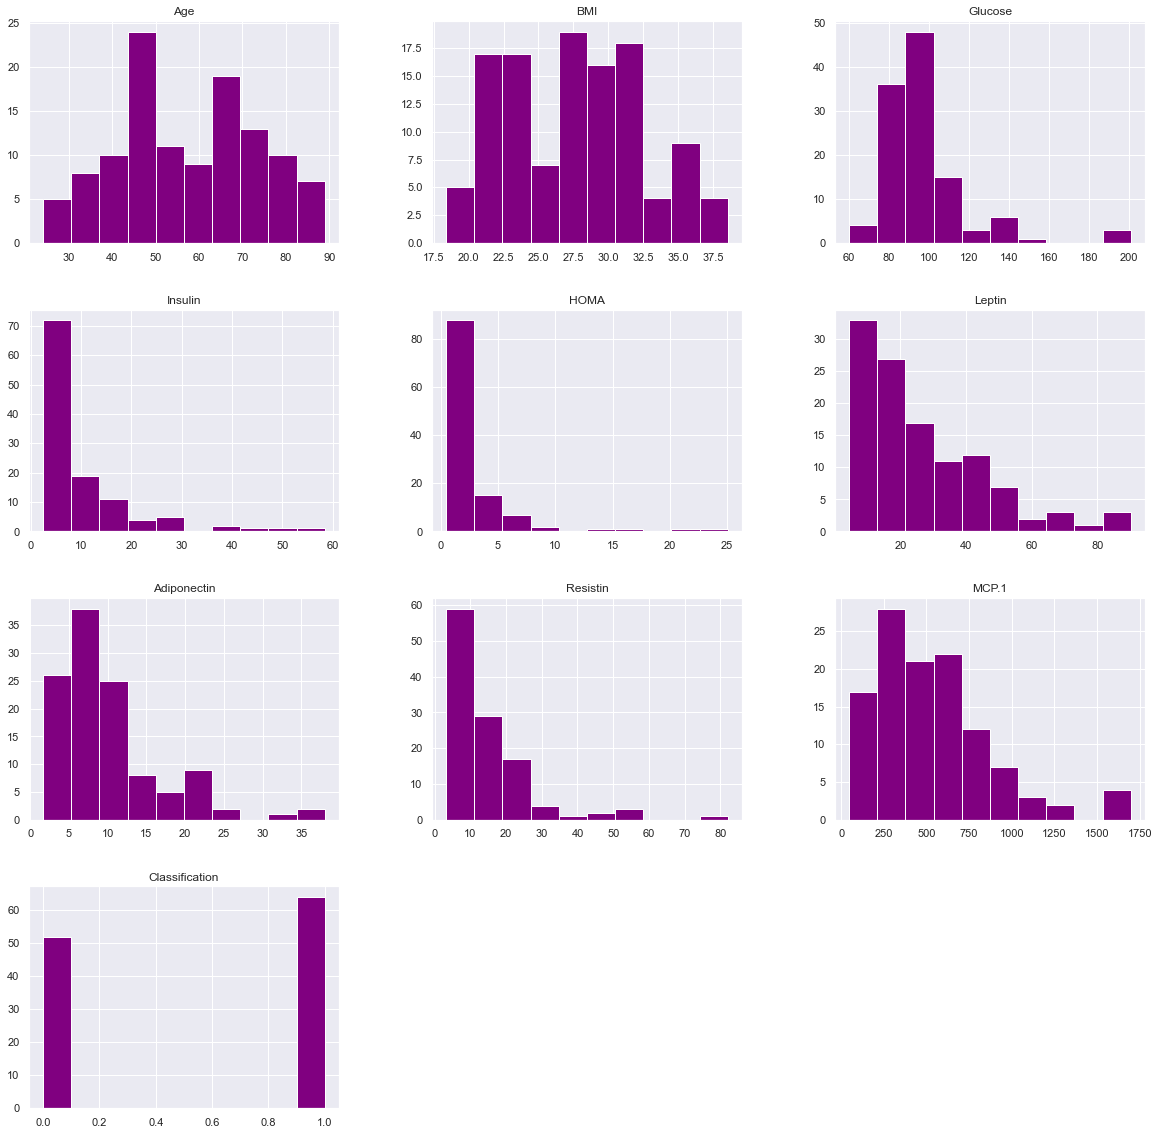

In [6]:
#Observando a distribuição dos dados
sns.set(style='darkgrid',rc={'figure.figsize':(20,20)})
df_cancer.hist(color='purple');

Como podemos ver no gráficos de histogramas acima para ver o quanto os dados estão distribuidos podemos ver que se tem pessoas de várias idades, e quanto as outras variaveis, com exceção da classificação temos que os daods se concentram na primeira parte enquanto a classificação temos mais ou menos quase a mesma quantidade de quem tem em que não tem. 

Obervando a figura, vamos observar os dados mais distoantes da pesquisa q foi obtida no artigo que foi feito:
Insulina, Homa e Resistin.

![figura1](https://ourimagehosting.com/images/2022/04/23/Homa.png)

In [7]:
# Insulina
px.histogram(df_cancer,x='Insulin',color='Classification',
title= 'Histograma da insulina em caso com cancer e sem',
labels={'Insulin':'Insulina','Classification':'Classificação'})

Podemos ver que a quantidade de insulina no um tem uma certa tendeência de alcançar niveis maiores em relação ao que não tem, como pode ser visto neste pagina de Victor Sorrentino em 2018 nesse [link](https://tourlife.com.br/insulina-e-cancer/) em que diz já em uma pesquisa de 1992 apresentava os seguintes resultados:
    
    "foi comprovado que as mulheres com câncer de mama estavam com as taxas de peptídeo C – substância obtida quando a insulina é processada no organismo – mais altas do que o outro grupo que não tinha a doença.A conclusão do artigo é que a insulina e câncer estão ligados, pois a substância atua de maneira direta no crescimento celular do câncer. Assim, as altas taxas de insulina são um fator de risco mais grave que a maioria de outros motivos conhecidos."

In [8]:
px.histogram(df_cancer,x='HOMA',color='Classification',title= 'Histograma da HOMA em caso com cancer e sem',
labels={'Classification':'Classificação'})

Como podemos ver como HOMA é  resistência a insulina, então o caso é refrente a questão anterior de insulina.

In [9]:
px.histogram(df_cancer,x='Resistin',color='Classification',
title= 'Histograma de quantidade de Resistina em caso com cancer e sem',
labels={'Classification':'Classificação','Resistin':'Resistina'})

Podemos ver que quem tem cancer pode apresentar uma condição de resistina maior.

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?
2. Quais perguntas você tem sobre o conjunto de dados?
3. Há algo que você não entende nas visualizações?

**RESPOSTA** (VALE 0.6 pontos): mudaria os gráfico do histograma da insulina, resistin e HOMA e separar em dois gráfico cdo quem está com cancer ou não para melhor visualização.
No primeiro, pode tirar a variável  classificação  e colocar o mesmo em um boxplot, já que o mesmo é uma variavel categórica.

Após o feedback, o que você mudaria?

**RESPOSTA** (VALE 0.6 pontos): A primeira e em vez de um histograma, um gráfico de bosplot, e nos outros fazer um grafico de boxplot que separa melhor os dados.

Apresente suas nova(s) visualização(ões) a partir do feedback:

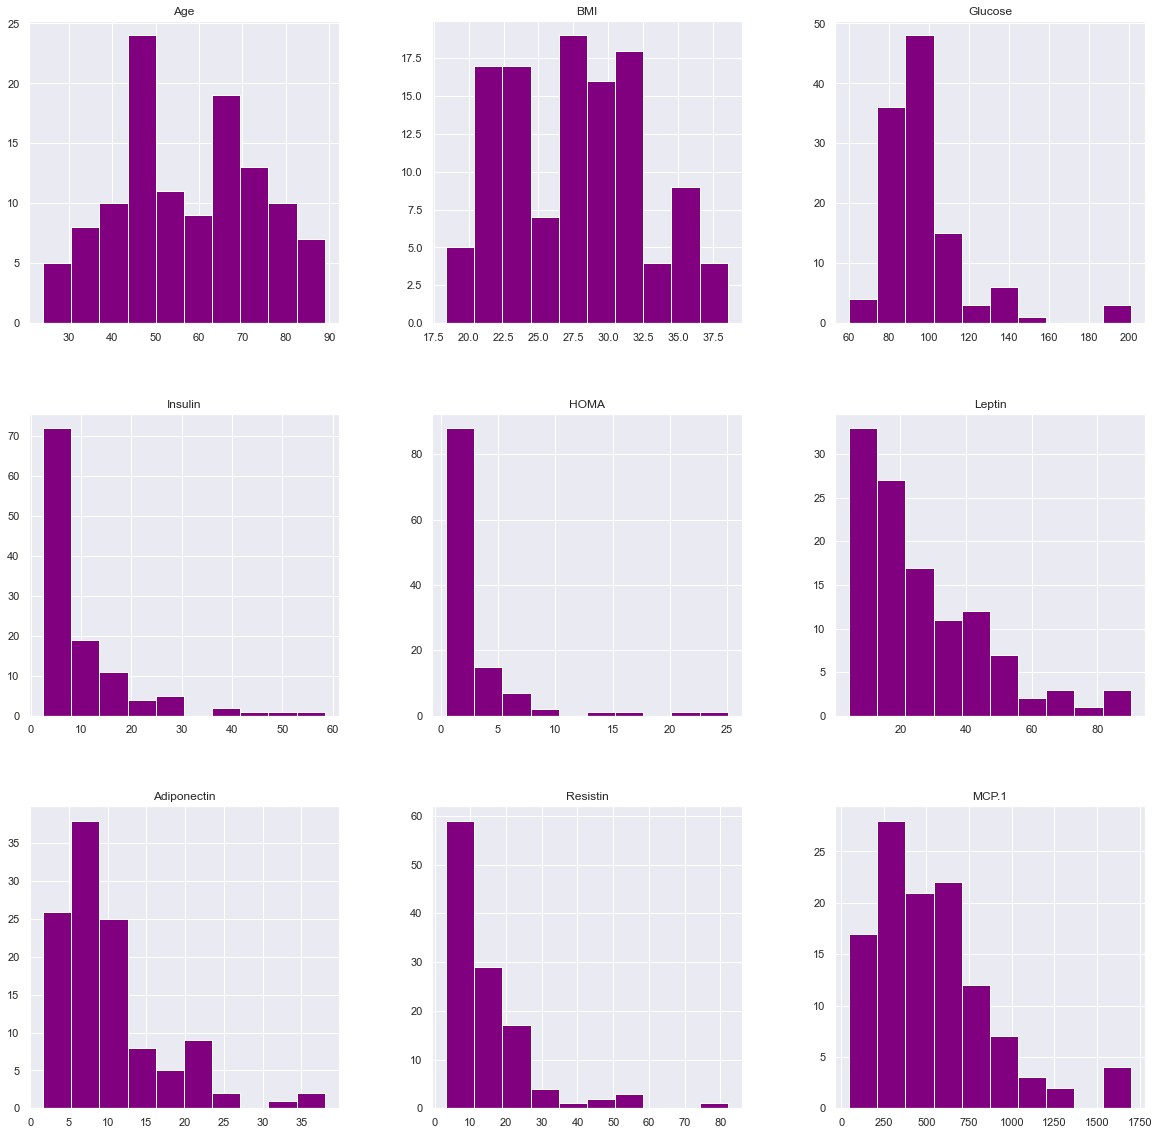

In [10]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

df_sem = df_cancer.drop(['Classification'],axis=1)
sns.set(style='darkgrid',rc={'figure.figsize':(20,20)})
df_sem.hist(color='purple');

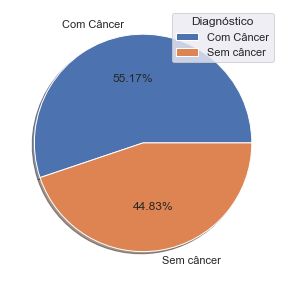

In [11]:
# Criando um gráfico de pizza para melhor visualizar a variavel da visualização
cla = df_cancer['Classification'].value_counts()
Classi = ['Com Câncer', 'Sem câncer']

plt.figure(figsize=(10,5))
plt.pie(cla,labels= Classi,shadow=True,autopct='%1.2f%%')
plt.legend(title='Diagnóstico')
plt.show()


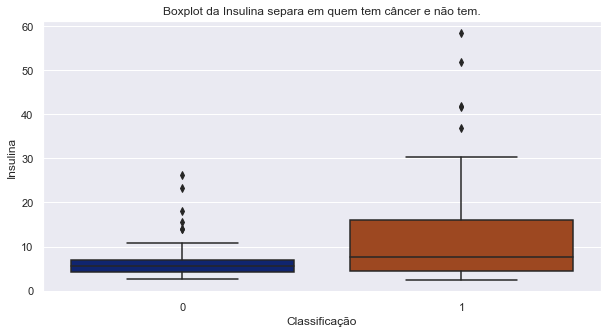

In [12]:
plt.figure(figsize=(10,5))
plt.title('Boxplot da Insulina separa em quem tem câncer e não tem.')
sns.boxplot(x='Classification',y='Insulin',data=df_cancer,palette='dark')
plt.xlabel('Classificação')
plt.ylabel('Insulina');

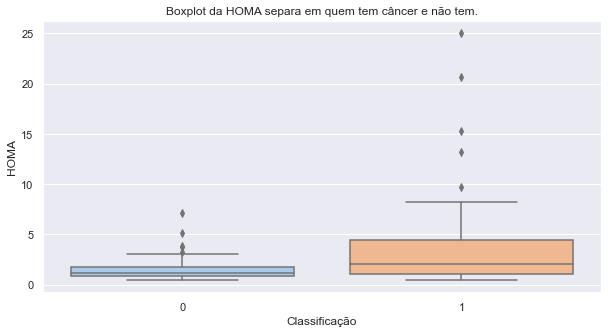

In [13]:
plt.figure(figsize=(10,5))
plt.title('Boxplot da HOMA separa em quem tem câncer e não tem.')
sns.boxplot(x='Classification',y='HOMA',data=df_cancer,palette='pastel')
plt.xlabel('Classificação')
plt.ylabel('HOMA');

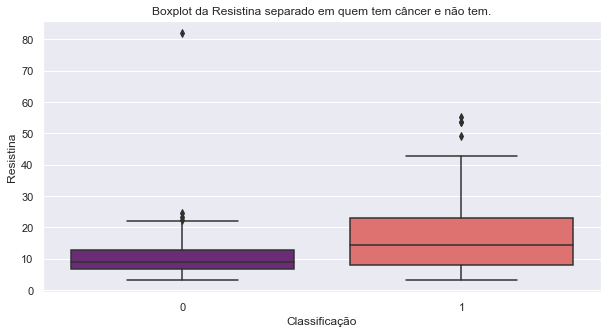

In [14]:
plt.figure(figsize=(10,5))
plt.title('Boxplot da Resistina separado em quem tem câncer e não tem.')
sns.boxplot(x='Classification',y='Resistin',data=df_cancer,palette='magma')
plt.xlabel('Classificação')
plt.ylabel('Resistina');

# Exercicio 3. (5.0 pontos)

Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

In [15]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import statsmodels.api as sm 

x1 = df_cancer.drop(['Classification'],axis=1)

y1 = df_cancer['Classification']


logit_model = sm.Logit(exog=x1, endog=y1)
resul = logit_model.fit(exog=x1,endog=y1)




Optimization terminated successfully.
         Current function value: 0.493418
         Iterations 9


/home/gustavo/anaconda3/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol. The list of unsupported keyword arguments passed include: endog, exog. After release 0.14, this will raise.



Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [16]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

print(resul.summary())

                           Logit Regression Results                           
Dep. Variable:         Classification   No. Observations:                  116
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.2826
Time:                        08:46:12   Log-Likelihood:                -57.236
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 3.533e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0284      0.015     -1.887      0.059      -0.058       0.001
BMI            -0.1767      0.065     -2.729      0.006      -0.304      -0.050
Glucose         0.0582      0.021      2.801    

Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [17]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Importando os comando do sklearn
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Vamos primeiro aplicar o modelo para todas as variaveis e depois aplicar apenas para as variaveis que foram levantados na mostra dos gráfico para comparar os resultados.

Modelo com todas as variaveis

In [18]:
x2 = df_cancer.drop(['Classification'],axis=1)
y2 = df_cancer.Classification
x2_std = StandardScaler().fit_transform(x2)

In [19]:
# Sepando os dados de treino e teste
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2_std,y2,test_size=0.2,random_state=10)

Segundo o artigo de Fernandes *et al* (2020),que pode ser acesado nesse [link](https://revistas.ufpr.br/rsp/article/view/78514/42349)  cita o seguinte:

    "Na regressão logística o tamanho da amostra é fundamental (Hair et al., 2009). Amostras pequenas tendem a
    produzir estimativas inconsistentes. Por outro lado, amostras excessivamente grandes aumentam o poder dos testes estatísticos de tal sorte que qualquer efeito tende a ser estatisticamente significativo, independentemente da magnitude.'

Assim foi decidido utilizar apenas 20% dos dados para teste para dar uma certa quantidades maior para ser treinado

In [20]:
r_log = LogisticRegression()
r_log.fit(x2_teste,y2_teste)

y2_pred = r_log.predict(x2_teste)

Coloque abaixo a matriz de confusão do modelo feito:

In [21]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

conf_ma = confusion_matrix(y2_teste,y2_pred)
print(conf_ma)

[[11  1]
 [ 2 10]]


Para ficar mais fácil a visualização da matriz de confusão, plotaremos a mesma em um heatmap

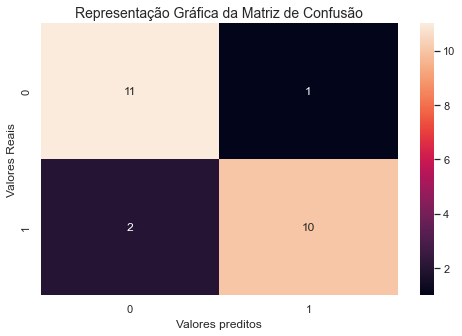

In [22]:
plt.figure(figsize=(8,5))
plt.title('Representação Gráfica da Matriz de Confusão',fontsize=14)
sns.heatmap(conf_ma,annot=True)
plt.xlabel('Valores preditos')
plt.ylabel('Valores Reais');

Agora só com as 3 que foram levantadas

In [24]:
x3 = df_cancer[['Insulin','HOMA','Resistin']]
x3_std = StandardScaler().fit_transform(x3)

In [25]:
x3_treino, x3_teste, y3_treino, y3_teste = train_test_split(x3_std,y2,test_size=0.2,random_state=10)

In [26]:
lg_2 = LogisticRegression()
lg_2.fit(x3_treino,y3_treino)

LogisticRegression()

In [27]:
y3_pred = lg_2.predict(x3_teste)

In [29]:
conf_ma2 = confusion_matrix(y3_teste,y3_pred)
print(conf_ma2)

[[ 8  4]
 [ 2 10]]


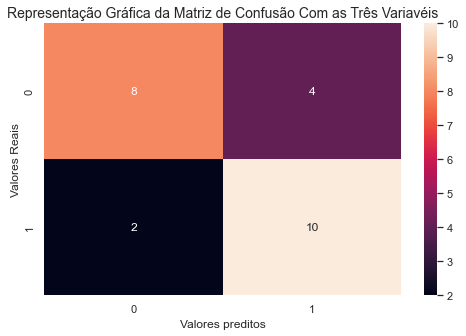

In [30]:
plt.figure(figsize=(8,5))
plt.title('Representação Gráfica da Matriz de Confusão Com as Três Variavéis',fontsize=14)
sns.heatmap(conf_ma2,annot=True)
plt.xlabel('Valores preditos')
plt.ylabel('Valores Reais');

Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [31]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados

# Comparando com todas avariaveis e com as três variaveis
print('Com todas as variavéis')
print('acurácia: {:.3f}'.format(np.trace(conf_ma)/np.sum(conf_ma)))
print('precisão: {:.3f}'.format(conf_ma[0][0]/np.sum(conf_ma[:,0])))
print('especificidade: {:.3f}'.format(conf_ma[1][1]/np.sum(conf_ma[:,1])))
print('sensitividade: {:.3f}'.format(conf_ma[0][0]/np.sum(conf_ma[0])))

print('-'*15)

print('Com três variaveis escolhidas')
print('acurácia: {:.3f}'.format(np.trace(conf_ma2)/np.sum(conf_ma2)))
print('precisão: {:.3f}'.format(conf_ma2[0][0]/np.sum(conf_ma2[:,0])))
print('especificidade: {:.3f}'.format(conf_ma2[1][1]/np.sum(conf_ma2[:,1])))
print('sensitividade: {:.3f}'.format(conf_ma2[0][0]/np.sum(conf_ma2[0])))

Com todas as variavéis
acurácia: 0.875
precisão: 0.846
especificidade: 0.909
sensitividade: 0.917
---------------
Com três variaveis escolhidas
acurácia: 0.750
precisão: 0.800
especificidade: 0.714
sensitividade: 0.667


Como podemos observar, com todas as variaveis teve uma perfomace melhor com as que foram levantadas.

Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?

**RESPOSTA** (VALE 1.0 ponto): Comparando as métricas da especifidade e da precisão, pela precisão ser menor que a especificidade então o modelo tende a obter mais erros do tipo I com todas as variaveis, já com as 3 teve mais erros do tipo II.